# K Nearest Neighbour

The KNN classification problem statement on the Iris dataset involves using the KNN algorithm to classify the species of iris plants (Iris Setosa, Iris Versicolor, and Iris Virginica) based on their sepal length, sepal width, petal length, and petal width. The goal is to build a model that can accurately predict the species of a new iris plant based on its measurements. The Iris dataset is commonly used as a beginner's dataset for machine learning classification problems.

 ## 1.Importing and preperation of data

In [73]:
import numpy as np
import pandas as pd

In [74]:
# Importing the dataset
dataset = pd.read_csv('/content/iris.csv')

##### Load dataset

NOTE: Iris dataset includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

Summarize the Dataset

In [75]:
# We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.
dataset.shape

(150, 6)

In [76]:
dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [77]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [78]:
# Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### **Dividing data into features and labels**




NOTE: As we can see dataset contain six columns: Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm and Species. The actual features are described by columns 1-4. Last column contains labels of samples. Firstly we need to split data into two arrays: X (features) and y (labels).

In [79]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = dataset[feature_columns].values
y = dataset['Species'].values


1. This line defines a list of features that will be used as inputs to the model. In this case, it's the sepal length, sepal width, petal length, and petal width of various iris flowers.
These features will be used to predict the species of the iris flower.

2. #This line extracts the feature columns from the dataset and converts them into a 2D NumPy array, which will be used as the input to the model.The resulting X variable contains all the feature data for each iris flower.

3.  This line extracts the Species column from the dataset, which contains the target class for each iris flower.This target data will be used as the label in the model training.The resulting y variable is a 1D NumPy array containing the target class for each iris flower.


### Label encoding

NOTE: As we can see labels are categorical. KNeighborsClassifier does not accept string labels. We need to use LabelEncoder to transform them into numbers. Iris-setosa correspond to 0, Iris-versicolor correspond to 1 and Iris-virginica correspond to 2.

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

1. The line of code "from sklearn.preprocessing import LabelEncoder" is importing the LabelEncoder class from the sklearn.preprocessing module.This class is used to encode categorical variables as numerical values.

2. The line of code "le = LabelEncoder()" creates an instance of the LabelEncoder class and assigns it to the variable "le".

3.  calls the fit_transform method on the LabelEncoder instance "le" and passes the target variable "y" as an argument.The fit_transform method fits the LabelEncoder to the target variable "y" and then transforms it into numerical values, which are then stored in the same "y" variable

### Spliting dataset into training set and test set

In [81]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

The code "from sklearn.model_selection import train_test_split" is used to import the function "train_test_split" from the "model_selection" module in the scikit-learn library.

The function "train_test_split" is used to split the data into two parts: the training set and the test set. The training set is used to train the machine learning model and the test set is used to evaluate the performance of the model. The reason for splitting the data into two sets is to prevent overfitting. Overfitting is when a model performs well on the training data but poorly on new, unseen data. By evaluating the model on a test set, we can get a better estimate of its performance on unseen data.

The "train_test_split" function takes four parameters: X, y, test_size, and random_state.

"X" is the input data (features)
"y" is the target data (labels)
"test_size" is the fraction of the data that should be reserved for the test set. In this case, the test set is 20% of the total data and the training set is 80%.
"random_state" is a random seed used to randomly split the data into two parts. This is useful when we want to get reproducible results. By setting a fixed random seed, we can make sure that the same split is performed each time we run the code.

Lastly, because features values are in the same order of magnitude, there is no need for feature scaling. Nevertheless in other sercostamses it is extremly important to apply feature scaling before running classification algorythms.

In [82]:
dataset = pd.DataFrame(dataset)

### 2. Data Visualization

#### 2.1. scatter plot matrix

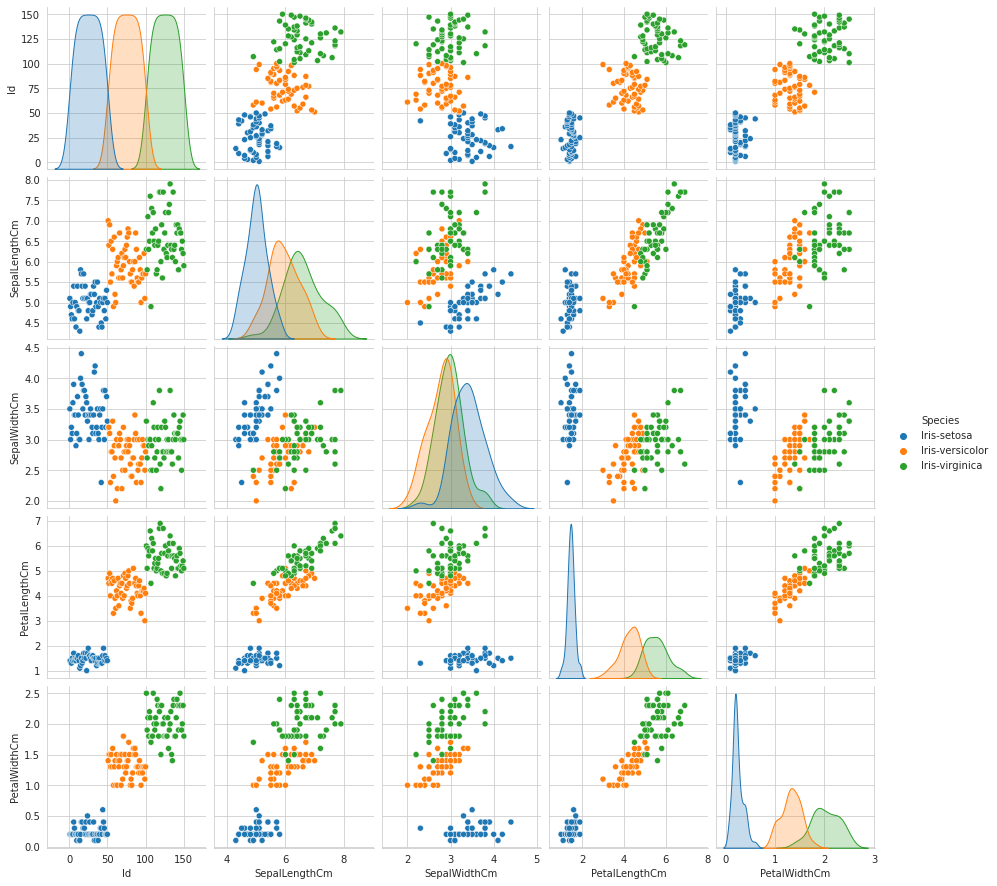

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot matrix
sns.pairplot(dataset, hue='Species')

# Show the plot
plt.show()


The code above is used to create a scatter plot matrix using the seaborn library and visualize the relationships between different features in the dataset. The scatter plot matrix is a graphical representation that uses scatter plots to show the relationship between multiple variables in a dataset.

The sns.pairplot function creates a scatter plot matrix for all the features in the dataset and colors each point based on its target label ('Species'). The hue argument is used to specify which column should be used for coloring the points.

Finally, the plt.show function is used to display the plot.

#### 2.2. Pairplot

Pairwise is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset.

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

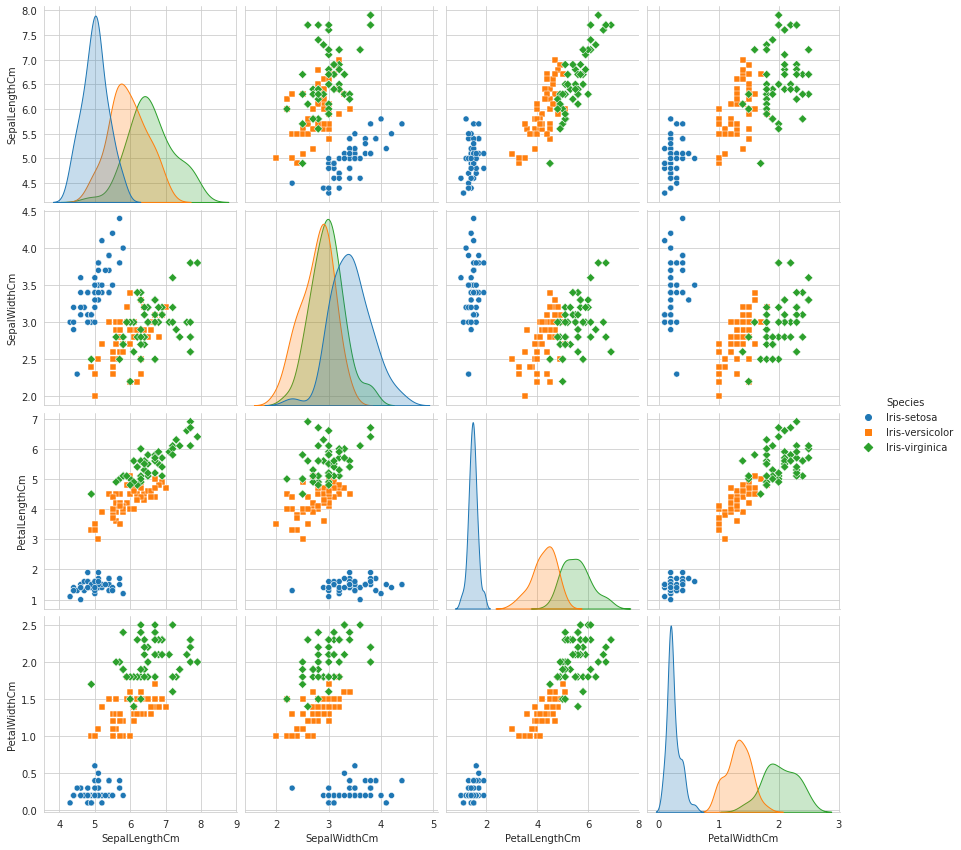

In [84]:
plt.figure()
sns.pairplot(dataset.drop("Id", axis=1), hue = "Species", size=3, markers=["o", "s", "D"])
plt.show()

The code above is creating a scatter plot matrix to visualize the relationship between the features in the iris dataset. The visualization helps to identify patterns, trends and relationships in the data, which can be useful in developing an effective machine learning model.

The sns.pairplot function from the seaborn library is used to create the scatter plot matrix. The first argument is the dataset, which is passed in as dataset.drop("Id", axis=1) to exclude the "Id" column, which is not a feature of the iris dataset.

The hue argument is set to "Species" to differentiate the scatter plot points by species. This allows us to visualize the differences in the features between the different species. The size argument is set to 3 to adjust the size of the scatter plot points, and the markers argument is set to ["o", "s", "D"] to specify the markers used for each species in the scatter plot.

Finally, the plt.show() function is used to display the scatter plot matrix. The plt.figure() function is used to create a new figure for the plot, but it does not affect the plot itself.

#### 2.3. Boxplots

<Figure size 432x288 with 0 Axes>

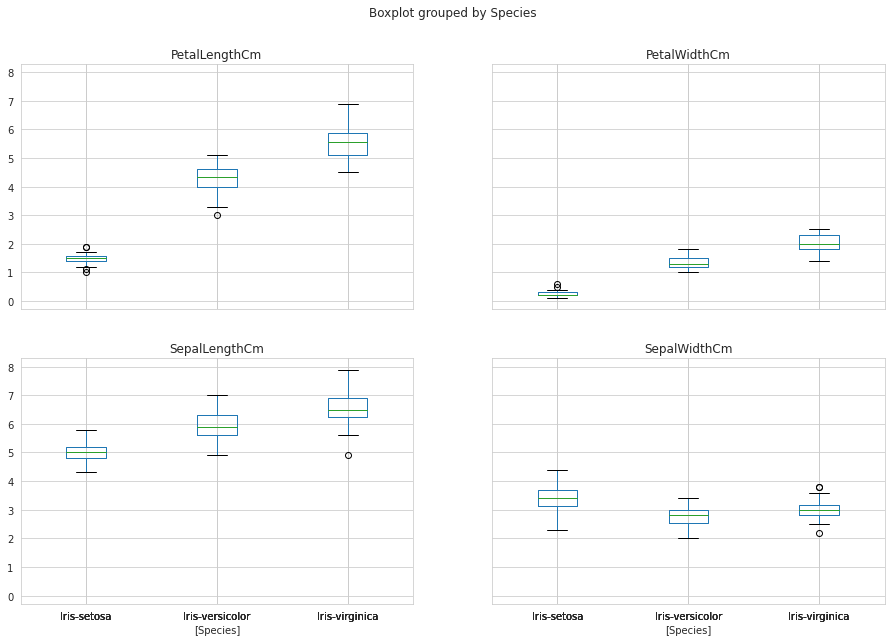

In [85]:
plt.figure()
dataset.drop("Id", axis=1).boxplot(by="Species", figsize=(15, 10))
plt.show()

The code above creates a box plot of the features in the Iris dataset, grouped by the species column. The purpose of this code is to visualize the distribution of the features across the different species of iris in the dataset.

Here is what each line of the code does:

1. plt.figure(): This line creates a new figure in matplotlib, which is a container that holds all of the plot elements.

2. dataset.drop("Id", axis=1): This line drops the "Id" column from the dataset.

3. boxplot(by="Species", figsize=(15, 10)): This line creates a box plot of the features in the dataset, with the boxes separated based on the species of the iris flowers. The by argument specifies the column to group by, and the figsize argument sets the size of the plot.

4. plt.show(): This line displays the plot.





## 3. Using KNN for classification

#### 3.1. Making predictions

In [86]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


This code is fitting a K-Nearest Neighbors (KNN) classifier to the training data. The KNN algorithm is a simple, non-parametric method for classification. The basic idea is to find the K nearest neighbors of a given sample in the feature space, and assign the class label based on the majority vote of these neighbors.

The code first instantiates a KNN classifier object with n_neighbors=3, meaning that for each sample, the algorithm will look for the three nearest neighbors in the training data and classify the sample based on the majority vote of these neighbors. Then, the fit method is used to fit the KNN classifier to the training data (X_train, y_train). Finally, the predict method is used to make predictions on the test data X_test and store the results in y_pred

#### 3.2. Evaluating predictions

In [88]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

The code creates a confusion matrix cm to evaluate the performance of a classification algorithm. The confusion matrix is a table that is used to evaluate the performance of a classifier. It contains information about the true positive, true negative, false positive, and false negative predictions made by the classifier.

The confusion matrix is created using the true target values y_test and the predicted target values y_pred. The confusion_matrix function from the scikit-learn library is used to create the matrix. The cm object is then displayed to show the results of the confusion matrix.

Calculating model accuracy:

In [89]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


The code is used to calculate the accuracy of the KNN classifier model that was built and trained earlier. The accuracy score is calculated as the ratio of correctly predicted samples to the total number of samples in the test set.

The function accuracy_score from the scikit-learn library is used to calculate the accuracy. This function takes two arguments, the actual target values (y_test) and the predicted target values (y_pred), and returns the accuracy score as a float value between 0 and 1.

The accuracy score is then multiplied by 100 to convert it into a percentage and the result is rounded to two decimal places using the round function. The result is then printed to the console using the print function.

#### 3.3. Using cross-validation for parameter tuning:


In [90]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

This code is performing a 10-fold cross-validation to evaluate the performance of the KNN (k-nearest neighbors) algorithm. The purpose of cross-validation is to assess the generalization ability of a model, that is, how well the model is likely to perform on unseen data.

The code creates a list of "k" values to use as the number of nearest neighbors in the KNN algorithm. The list starts at 1 and increases by 2 until it reaches 49. For each "k" value, a KNeighborsClassifier is instantiated with that value of "k", and the cross-val_score function from scikit-learn is used to evaluate the accuracy of the KNN model with 10-fold cross-validation. The mean accuracy for each "k" value is calculated and appended to the "cv_scores" list. This process is repeated for each "k" value in the "k_list".

In this way, we can determine the optimal value of "k" for the KNN algorithm, which is the one that provides the best accuracy according to the 10-fold cross-validation procedure.

<Figure size 432x288 with 0 Axes>

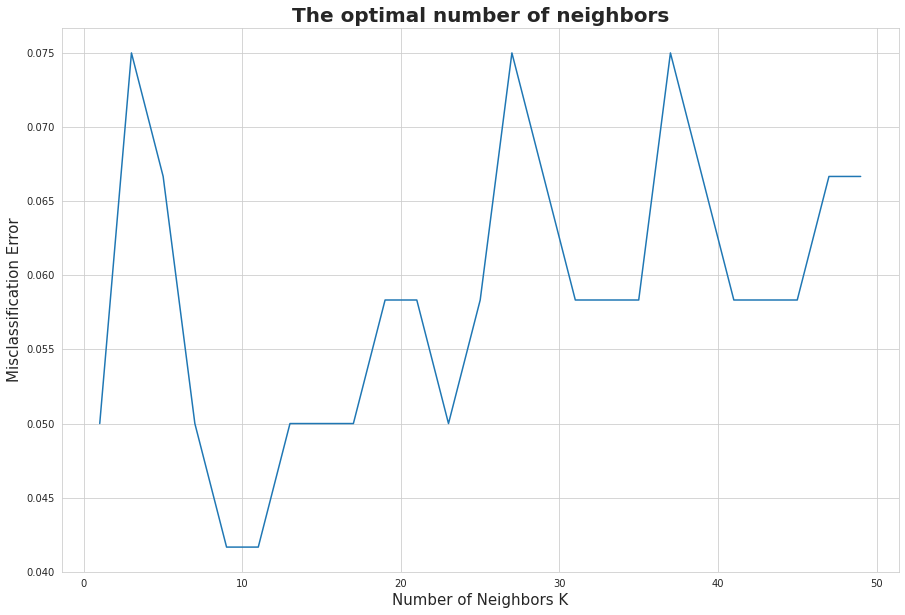

In [91]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

This code is plotting the misclassification error as a function of the number of neighbors in a K-Nearest Neighbors (KNN) classifier.

The line MSE = [1 - x for x in cv_scores] is converting the cross-validation (cv) scores to misclassification error by subtracting each value in the cv_scores list from 1. The cross-validation scores are probably accuracy scores, and so this line is converting them to misclassification error, which is just 1 minus accuracy.

The subsequent code creates a plot using the matplotlib library. The plot has a title "The optimal number of neighbors," x-axis label "Number of Neighbors K," y-axis label "Misclassification Error," and the data being plotted is the list of K values (k_list) and the corresponding misclassification errors (MSE).

The purpose of this plot is likely to find the optimal number of neighbors for the KNN classifier, where the optimal number of neighbors is the value of K that results in the lowest misclassification error. This information can then be used to choose the best K value for the KNN classifier.

In [92]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)


The optimal number of neighbors is 9.


The code is finding the best value of k for the K-Nearest Neighbors (KNN) classifier.

The line best_k = k_list[MSE.index(min(MSE))] is finding the index of the minimum misclassification error in the MSE list, and then using that index to find the corresponding value of k in the k_list. The variable best_k will store the value of k that corresponds to the minimum misclassification error.

The line print("The optimal number of neighbors is %d." % best_k) then outputs the result to the console, stating that the optimal number of neighbors is the value stored in best_k.

In summary, this code is finding the value of k in the k_list that corresponds to the minimum misclassification error, and is outputting that value as the optimal number of neighbors for the KNN classifier.